In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv")

In [3]:
df.dtypes

card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [4]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [5]:
df["card"] = (df["card"]=="yes").astype('int8')
df["owner"] = (df["owner"]=="yes").astype('int8')
df["selfemp"] = (df["selfemp"]=="yes").astype('int8')

In [6]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [7]:
df.card.value_counts(normalize=True)

1    0.775588
0    0.224412
Name: card, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
df_val.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,24.00000,2.7811,0.052555,121.63330,0,0,0,3,1,0
1,0,0,34.25000,1.9440,0.000617,0.00000,0,0,1,54,1,1
2,1,0,39.75000,2.4200,0.017019,34.15583,1,0,1,49,1,25
3,0,2,25.91667,2.0700,0.000580,0.00000,0,0,0,20,0,7
4,1,0,33.75000,2.5000,0.077518,161.16170,1,0,1,30,1,6


In [11]:
len(df_train), len(df_test), len(df_val)

(791, 264, 264)

In [12]:
y_train = df_train["card"].values
y_val = df_val["card"].values
y_test = df_test["card"].values

del df_train["card"]
del df_val["card"]
del df_test["card"]

In [13]:
df_train.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,3,40.50000,4.0128,0.000299,0.00000,0,0,1,12,1,17
1,1,32.33333,6.0000,0.000200,0.00000,1,0,4,18,1,4
2,1,29.16667,2.2000,0.038205,69.79333,0,0,0,49,1,7
3,1,54.66667,7.2900,0.106536,647.20670,1,0,2,78,1,9
4,0,25.00000,3.3984,0.000353,0.00000,1,0,2,29,0,4


## Question 1
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score and compute AUC with the card variable.
- Use the training dataset for that.
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenditure'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- ``reports``
- ``dependents``
- ``active``
- ``share``

In [14]:
numerical = (df_train.columns[df_train.columns != "object"])

In [15]:
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve

In [16]:
numerical

Index(['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [17]:
feature_auc_score = []
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    
    print('%9s, %.3f' % (c, auc))

  reports, 0.717
      age, 0.524
   income, 0.591
    share, 0.989
expenditure, 0.991
    owner, 0.586
  selfemp, 0.510
dependents, 0.533
   months, 0.529
majorcards, 0.534
   active, 0.604


## Question 2

In [18]:
features = ["reports", "age", "income", "share", "expenditure",
 "dependents", "months", "majorcards", "active", "owner", "selfemp"]

In [19]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
dv = DictVectorizer(sparse=False)

In [20]:
train_dict = df_train[features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

In [21]:
round(roc_auc_score(y_val, y_pred),3)

0.995

## Question 3

Now let's compute precision and recall for our model.

- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

In [22]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

In [23]:
df_scores = confusion_matrix_dataframe(y_val, y_pred)

In [24]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [25]:
df_scores

,threshold,tp,fp,fn,tn,precision,recall
0,0.00,211,53,0,0,0.799242,1.000000
1,0.01,211,34,0,19,0.861224,1.000000
2,0.02,211,32,0,21,0.868313,1.000000
3,0.03,211,23,0,30,0.901709,1.000000
4,0.04,211,23,0,30,0.901709,1.000000
...,...,...,...,...,...,...,...
96,0.96,203,0,8,53,1.000000,0.962085
97,0.97,203,0,8,53,1.000000,0.962085
98,0.98,202,0,9,53,1.000000,0.957346
99,0.99,200,0,11,53,1.000000,0.947867


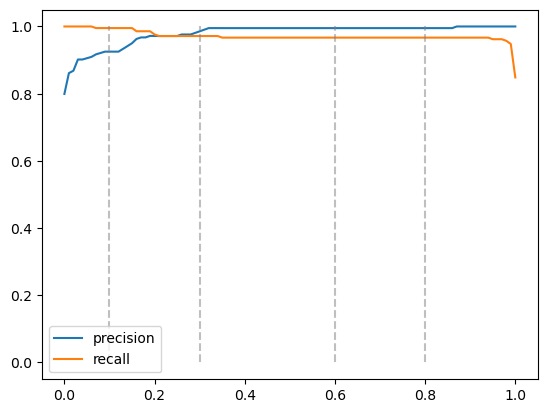

In [26]:
plt.plot(df_scores.threshold, df_scores.precision, label='precision')
plt.plot(df_scores.threshold, df_scores.recall, label='recall')

plt.vlines(0.1, 0, 1, color='grey', linestyle='--', alpha=0.5)
plt.vlines(0.3, 0, 1, color='grey', linestyle='--', alpha=0.5)
plt.vlines(0.6, 0, 1, color='grey', linestyle='--', alpha=0.5)
plt.vlines(0.8, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1 = 2 * P * R / (P + R)

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

In [27]:
df_scores["f1"] = 2 * df_scores["precision"] * df_scores["recall"] / (df_scores["precision"] + df_scores["recall"])

In [28]:
df_scores[::10]

,threshold,tp,fp,fn,tn,precision,recall,f1
0,0.0,211,53,0,0,0.799242,1.000000,0.888421
10,0.1,210,17,1,36,0.925110,0.995261,0.958904
20,0.2,206,6,5,47,0.971698,0.976303,0.973995
30,0.3,205,3,6,50,0.985577,0.971564,0.978520
40,0.4,204,1,7,52,0.995122,0.966825,0.980769
50,0.5,204,1,7,52,0.995122,0.966825,0.980769
60,0.6,204,1,7,52,0.995122,0.966825,0.980769
70,0.7,204,1,7,52,0.995122,0.966825,0.980769
80,0.8,204,1,7,52,0.995122,0.966825,0.980769
90,0.9,204,0,7,53,1.000000,0.966825,0.983133


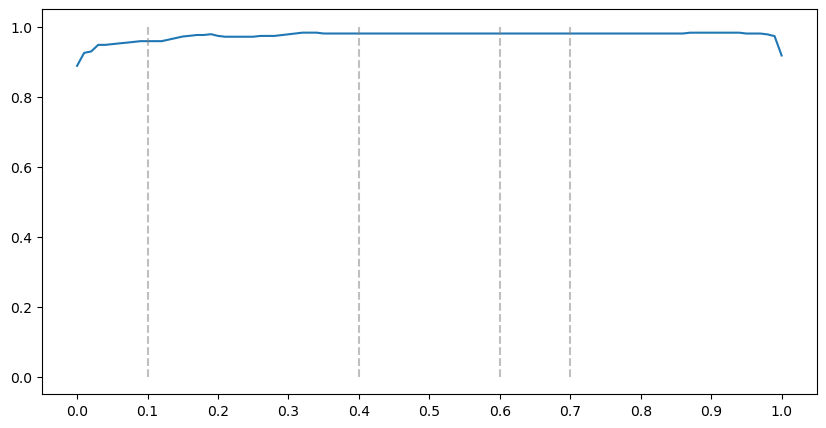

In [29]:
plt.figure(figsize=(10, 5))

plt.plot(df_scores.threshold, df_scores.f1)
plt.vlines(0.1, 0, 1, color='grey', linestyle='--', alpha=0.5)
plt.vlines(0.4, 0, 1, color='grey', linestyle='--', alpha=0.5)
plt.vlines(0.6, 0, 1, color='grey', linestyle='--', alpha=0.5)
plt.vlines(0.7, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

## Question 5

Use the ``KFold`` class from Scikit-Learn to evaluate our model on 5 different folds:

``KFold(n_splits=5, shuffle=True, random_state=1)``

- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?

In [30]:
from sklearn.model_selection import KFold

In [31]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[features].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [32]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.card.values
    y_val = df_val.card.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.996 +- 0.003


## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

- Iterate over the following C values: [0.01, 0.1, 1, 10]
- Initialize KFold with the same parameters as previously
- Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [33]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, 0.992 +- 0.006
C= 0.1, 0.994 +- 0.005
C=   1, 0.996 +- 0.003
C=  10, 0.997 +- 0.003
